# HW2 나만의 손 글씨 인식 해보기

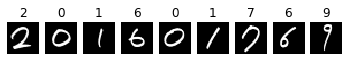

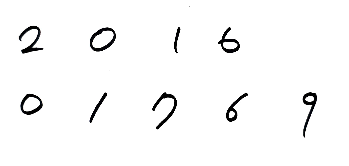

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import glob
import imutils

def show_image_label():
    fig = plt.figure()
    for image_file_name in glob.glob('my_own_images/my_id_?_?.png'):

        id_order = int(image_file_name[-7:-6])
        correct_label= int(image_file_name[-5:-4])
        #print("***correct_label:", correct_label)

        image_array = imageio.imread(image_file_name)
        image_array = image_array[:,:,0]
        #print(image_array.shape)
        #print(image_array)

        image_data = 255.0 - image_array.reshape(784)
        image_data = (image_data/255.0 *0.99) +0.01

        ax = fig.add_subplot(1, 9, id_order)
        ax.imshow(image_array, cmap='Greys', interpolation='None')
        ax.set_title(correct_label)
        ax.axis("off")
    plt.show()

show_image_label()
plt.imshow(imageio.imread('my_own_images/my.png'))
plt.axis("off")
plt.show()

# 신경망 학습 & 테스트 클래스

In [2]:
import numpy as np
import scipy
from scipy import special
import matplotlib.pyplot as plt

In [3]:
#신경망 클래스의 정의
class neuralNetwork2:
    
    #신경망 초기화 하기
    def __init__(self, inputnodes, hiddennodes1, hiddennodes2, outputnodes, learningrate):
        #입력, 은닉, 출력 계층의 노드 개수 설정
        self.inodes = inputnodes
        self.hnodes1 = hiddennodes1
        self.hnodes2 = hiddennodes2
        self.onodes = outputnodes
        
        #가중치 행렬 wih와 who
        #배열 내 가중치는 w_i_j로 표기, 노드i에서 다음 계층의 노드j로 연결됨을 의미
        self.wih1 = (np.random.rand(self.hnodes1, self.inodes) - 0.5)
        self.wh1h2 = (np.random.rand(self.hnodes2, self.hnodes1) - 0.5)
        self.wh2o = (np.random.rand(self.onodes, self.hnodes2) - 0.5)
        
        #학습률
        self.lr = learningrate
        
        #활성화 함수로 시그모이드 함수를 이용s
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    #신경망 학습시키기
    def train(self, input_list, target_list):
        #입력리스트들
        inputs = np.array(input_list, ndmin=2).T
        targets = np.array(target_list, ndmin=2).T
    
        #계층간 전달
        hidden_inputs1 = np.dot(self.wih1, inputs)
        hidden_outputs1 = self.activation_function(hidden_inputs1)
        hidden_inputs2 = np.dot(self.wh1h2, hidden_outputs1)
        hidden_outputs2 = self.activation_function(hidden_inputs2)
        final_inputs = np.dot(self.wh2o, hidden_outputs2)
        final_outputs  = self.activation_function(final_inputs)
        
        # (실제 값 - 계산값) 오차
        output_errors = targets - final_outputs
        hidden_errors2 = np.dot(self.wh2o.T, output_errors)
        hidden_errors1 = np.dot(self.wh1h2.T, hidden_errors2)
        
        self.wh2o += self.lr * np.dot((output_errors * final_outputs * (1.0 -final_outputs)), np.transpose(hidden_outputs2))
        self.wh1h2 += self.lr * np.dot((hidden_errors2 * hidden_outputs2 * (1.0 -hidden_outputs2)), np.transpose(hidden_outputs1))
        self.wih1 += self.lr * np.dot((hidden_errors1 * hidden_outputs1 * (1.0 -hidden_outputs1)), np.transpose(inputs))
        pass
    
    #신경망에 질의하기
    def query(self, input_list):
        inputs = np.array(input_list, ndmin=2).T
    
        hidden_inputs1 = np.dot(self.wih1, inputs)
        hidden_outputs1 = self.activation_function(hidden_inputs1)
        hidden_inputs2 = np.dot(self.wh1h2, hidden_outputs1)
        hidden_outputs2 = self.activation_function(hidden_inputs2)
        final_inputs = np.dot(self.wh2o, hidden_outputs2)
        final_outputs  = self.activation_function(final_inputs)
        return  final_outputs

In [4]:
def testAllNeuralNet(e):
    test_data_file = open("mnist_dataset/mnist_test.csv","r")
    test_data_list = test_data_file.readlines()
    test_data_file.close()

    scorecard1 = []
    scorecard2 = []
    predict2 = []
    
    for record in test_data_list:
        all_values = record.split(',')
        correct_label = int(all_values[0])
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        outputs = n.query(inputs)
        label = np.argmax(outputs)

        if(label == correct_label):
            scorecard1.append(1)
        else:
            scorecard1.append(0)
            pass
        pass
    
    for image_file_name in glob.glob('my_own_images/my_id_?_?.png'):
        correct_label= int(image_file_name[-5:-4])
        image_array = imageio.imread(image_file_name)
        image_array = image_array[:,:,0]
        image_data = 255.0 - image_array.reshape(784)
        image_data = (image_data/255.0 *0.99) +0.01

        outputs = n.query(image_data)
        label = np.argmax(outputs)
        predict2.append(label)
        if(label == correct_label):
            scorecard2.append(1)
        else:
            scorecard2.append(0)
            pass
        pass

    scorecard_array1 = np.asarray(scorecard1)
    scorecard_array2 = np.asarray(scorecard2)
    print(predict2)
    print(scorecard_array2)
    print("epochs =", e,
     "h_nodes1 = ", hidden_nodes1, " h_nodes2 = ", hidden_nodes2,
     " learn_rate = ", learning_rate, " perform = ",scorecard_array1.sum() / scorecard_array1.size, 
     " my_perfrom = ",scorecard_array2.sum() / scorecard_array2.size)

# 하이퍼 파라미터

In [5]:
input_nodes = 784
hidden_nodes1 = 400
hidden_nodes2 = 200
output_nodes = 10
learning_rate = 0.005
epochs = 10

n = neuralNetwork2(input_nodes, hidden_nodes1, hidden_nodes2, output_nodes, learning_rate)

#100~200
#0.3~0.03
#5~10

# 학습 시작

In [69]:
train_data_file = open("mnist_dataset/mnist_train.csv","r")
train_data_list = train_data_file.readlines()
train_data_file.close()
    
for e in range(epochs):
    for record in train_data_list:
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 #0~255값 -> 0.01~1사이의 값
        targets = np.zeros(output_nodes) + 0.01 #결과값중 아닌것들은 0.01
        targets[int(all_values[0])] = 0.99      #결과값중 맞는것은 0.99
        n.train(inputs, targets)
    testAllNeuralNet(e+1)
pass

[2, 0, 1, 6, 0, 1, 7, 0, 1]
[1 1 1 1 1 1 1 0 0]
epochs = 1 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9429  my_perfrom =  0.7777777777777778
[2, 0, 1, 6, 0, 1, 7, 6, 1]
[1 1 1 1 1 1 1 1 0]
epochs = 2 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9561  my_perfrom =  0.8888888888888888
[2, 0, 1, 6, 9, 1, 7, 6, 1]
[1 1 1 1 0 1 1 1 0]
epochs = 3 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9637  my_perfrom =  0.7777777777777778
[2, 0, 1, 6, 9, 1, 0, 6, 1]
[1 1 1 1 0 1 0 1 0]
epochs = 4 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9673  my_perfrom =  0.6666666666666666
[2, 0, 1, 6, 9, 1, 0, 6, 1]
[1 1 1 1 0 1 0 1 0]
epochs = 5 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9709  my_perfrom =  0.6666666666666666
[2, 0, 1, 6, 9, 1, 0, 6, 1]
[1 1 1 1 0 1 0 1 0]
epochs = 6 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9728  my_perfrom =  0.6666666666666666
[2, 

# 회전이전의 결과 

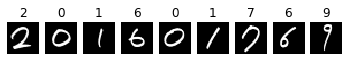

[2, 0, 1, 6, 2, 1, 2, 6, 3]
[1 1 1 1 0 1 0 1 0]
epochs = 2 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.1  perform =  0.9374  my_perfrom =  0.6666666666666666


In [62]:
show_image_label()
testAllNeuralNet(e+1)

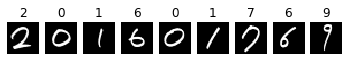

[2, 0, 1, 6, 9, 1, 8, 6, 3]
[1 1 1 1 0 1 0 1 0]
epochs = 10 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.05  perform =  0.9577  my_perfrom =  0.6666666666666666


In [67]:
show_image_label()
testAllNeuralNet(e+1)

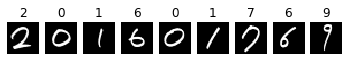

[2, 0, 1, 6, 9, 1, 9, 6, 7]
[1 1 1 1 0 1 0 1 0]
epochs = 10 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9768  my_perfrom =  0.6666666666666666


In [70]:
show_image_label()
testAllNeuralNet(e+1)

In [ ]:
epochs =  1 hidden_nodes1 =  200  hidden_nodes2 =  100 learning_rate =  0.01 performance =  0.7777777777777778
epochs =  2 hidden_nodes1 =  200  hidden_nodes2 =  100 learning_rate =  0.01 performance =  0.5555555555555556
epochs =  3 hidden_nodes1 =  200  hidden_nodes2 =  100 learning_rate =  0.01 performance =  0.6666666666666666
epochs =  4 hidden_nodes1 =  200  hidden_nodes2 =  100 learning_rate =  0.01 performance =  0.5555555555555556
epochs =  5 hidden_nodes1 =  200  hidden_nodes2 =  100 learning_rate =  0.01 performance =  0.5555555555555556
epochs =  6 hidden_nodes1 =  200  hidden_nodes2 =  100 learning_rate =  0.01 performance =  0.5555555555555556

In [ ]:
epochs = 1 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9372  my_perfrom =  0.7777777777777778
epochs = 2 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9531  my_perfrom =  0.5555555555555556
epochs = 3 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.962  my_perfrom =  0.6666666666666666
epochs = 4 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9669  my_perfrom =  0.5555555555555556
epochs = 5 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.971  my_perfrom =  0.6666666666666666
epochs = 6 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9721  my_perfrom =  0.6666666666666666
epochs = 7 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9741  my_perfrom =  0.5555555555555556
epochs = 8 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9754  my_perfrom =  0.5555555555555556
epochs = 9 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9767  my_perfrom =  0.5555555555555556
epochs = 10 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9766  my_perfrom =  0.5555555555555556

In [ ]:
[2, 0, 1, 6, 0, 1, 7, 0, 1]
[1 1 1 1 1 1 1 0 0]
epochs = 1 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9429  my_perfrom =  0.7777777777777778
[2, 0, 1, 6, 0, 1, 7, 6, 1]
[1 1 1 1 1 1 1 1 0]
epochs = 2 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9561  my_perfrom =  0.8888888888888888
[2, 0, 1, 6, 9, 1, 7, 6, 1]
[1 1 1 1 0 1 1 1 0]
epochs = 3 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9637  my_perfrom =  0.7777777777777778
[2, 0, 1, 6, 9, 1, 0, 6, 1]
[1 1 1 1 0 1 0 1 0]
epochs = 4 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9673  my_perfrom =  0.6666666666666666
[2, 0, 1, 6, 9, 1, 0, 6, 1]
[1 1 1 1 0 1 0 1 0]
epochs = 5 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.005  perform =  0.9709  my_perfrom =  0.6666666666666666
[2, 0, 1, 6, 9, 1, 0, 6, 1]
[1 1 1 1 0 1 0 1 0]

아무리해도 실제 정확도가 0.88888이상으로 나오는 상황을 찾기 힘들었으며, 실제로 더욱더 길게 훈련시킬수록 내 손글씨에 대한 예측정답률이 떨어지는 것을 확인할 수 있었음. 아무래도 MNIST의 특성에 맞춰 학습이 되어간다고 판단함.
따라서 교수님께서 말씀해주신 회전까지 추가하여 학습을 진행해보았음.

# 회전을 추가하여 학습 

In [15]:
input_nodes = 784
hidden_nodes1 = 400
hidden_nodes2 = 200
output_nodes = 10
learning_rate = 0.01
epochs = 20

In [16]:
train_data_file = open("mnist_dataset/mnist_train.csv","r")
train_data_list = train_data_file.readlines()
train_data_file.close()
    
for e in range(epochs):
    for record in train_data_list:
        for angle in np.arange(-30, 30, 10):
            all_values = record.split(',')
            inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 #0~255값 -> 0.01~1사이의 값
            
            pixels = inputs.reshape((28,28))
            inputs = imutils.rotate(pixels, angle) #회전
            inputs = inputs.reshape((784,))
            
            targets = np.zeros(output_nodes) + 0.01 #결과값중 아닌것들은 0.01
            targets[int(all_values[0])] = 0.99      #결과값중 맞는것은 0.99
            n.train(inputs, targets)
    testAllNeuralNet(e+1)
pass

[2, 9, 1, 6, 9, 1, 2, 5, 7]
[1 0 1 1 0 1 0 0 0]
epochs = 1 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.01  perform =  0.9676  my_perfrom =  0.4444444444444444
[2, 9, 1, 6, 9, 1, 2, 6, 7]
[1 0 1 1 0 1 0 1 0]
epochs = 2 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.01  perform =  0.9702  my_perfrom =  0.5555555555555556
[2, 9, 1, 6, 9, 1, 2, 6, 7]
[1 0 1 1 0 1 0 1 0]
epochs = 3 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.01  perform =  0.9717  my_perfrom =  0.5555555555555556
[2, 9, 1, 6, 9, 1, 2, 6, 7]
[1 0 1 1 0 1 0 1 0]
epochs = 4 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.01  perform =  0.973  my_perfrom =  0.5555555555555556
[2, 9, 1, 6, 0, 1, 2, 6, 7]
[1 0 1 1 1 1 0 1 0]
epochs = 5 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.01  perform =  0.9725  my_perfrom =  0.6666666666666666
[2, 0, 1, 6, 0, 1, 0, 6, 7]
[1 1 1 1 1 1 0 1 0]
epochs = 6 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.01  perform =  0.9726  my_perfrom =  0.7777777777777778
[2, 0, 1, 6

KeyboardInterrupt: 

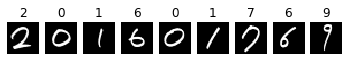

[2, 9, 1, 6, 9, 1, 2, 6, 2]
[1 0 1 1 0 1 0 1 0]
epochs = 1 h_nodes1 =  400  h_nodes2 =  100  learn_rate =  0.005  perform =  0.9638  my_perfrom =  0.5555555555555556


In [13]:
show_image_label()
testAllNeuralNet(e+1)

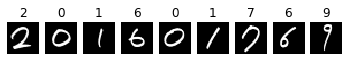

[2, 0, 1, 6, 9, 1, 2, 5, 1]
[1 1 1 1 0 1 0 0 0]
epochs = 10 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.01  perform =  0.9695  my_perfrom =  0.5555555555555556


In [17]:
show_image_label()
testAllNeuralNet(e+1)

##### 회전을 하였음에도 불구하고 성능에서는 그렇게 올라가지 않는 것을 확인 할수 있었는데, 비록 학습데이터는 회전을 통해 약 6배가 증가하였지만 실제 내가쓴 손글씨의 데이터를 이해하는데에는 조금 연관성이 없는 데이터가 아니었나 하는 생각이 들었다.

##### 실제 내 손글씨의 데이터가 정확도가 1이 나오게 하려면  내가 직접 데이터를 손으로 생성하여 학습데이터를 추가해야  아무래도 높은 정확도에 올라가지 않을까 하는 생각이 들었다.

# 201601769 나요한

In [ ]:
[2, 9, 1, 6, 9, 1, 2, 5, 7]
[1 0 1 1 0 1 0 0 0]
epochs = 1 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.01  perform =  0.9676  my_perfrom =  0.4444444444444444
[2, 9, 1, 6, 9, 1, 2, 6, 7]
[1 0 1 1 0 1 0 1 0]
epochs = 2 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.01  perform =  0.9702  my_perfrom =  0.5555555555555556
[2, 9, 1, 6, 9, 1, 2, 6, 7]
[1 0 1 1 0 1 0 1 0]
epochs = 3 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.01  perform =  0.9717  my_perfrom =  0.5555555555555556
[2, 9, 1, 6, 9, 1, 2, 6, 7]
[1 0 1 1 0 1 0 1 0]
epochs = 4 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.01  perform =  0.973  my_perfrom =  0.5555555555555556
[2, 9, 1, 6, 0, 1, 2, 6, 7]
[1 0 1 1 1 1 0 1 0]
epochs = 5 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.01  perform =  0.9725  my_perfrom =  0.6666666666666666
[2, 0, 1, 6, 0, 1, 0, 6, 7]
[1 1 1 1 1 1 0 1 0]
epochs = 6 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.01  perform =  0.9726  my_perfrom =  0.7777777777777778
[2, 0, 1, 6, 0, 1, 0, 5, 7]
[1 1 1 1 1 1 0 0 0]
epochs = 7 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.01  perform =  0.9706  my_perfrom =  0.6666666666666666
[2, 9, 1, 6, 9, 1, 2, 5, 7]
[1 0 1 1 0 1 0 0 0]
epochs = 8 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.01  perform =  0.9735  my_perfrom =  0.4444444444444444
[2, 0, 1, 6, 9, 1, 2, 5, 7]
[1 1 1 1 0 1 0 0 0]
epochs = 9 h_nodes1 =  400  h_nodes2 =  200  learn_rate =  0.01  perform =  0.9732  my_perfrom =  0.5555555555555556